In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

Test_Data = pd.read_csv(r"C:\Users\oscar\OneDrive\Documents\Year4_Project\FULL_ele_and_Mu_data_BACKUP_1.csv") 
print(len(Test_Data))

230798


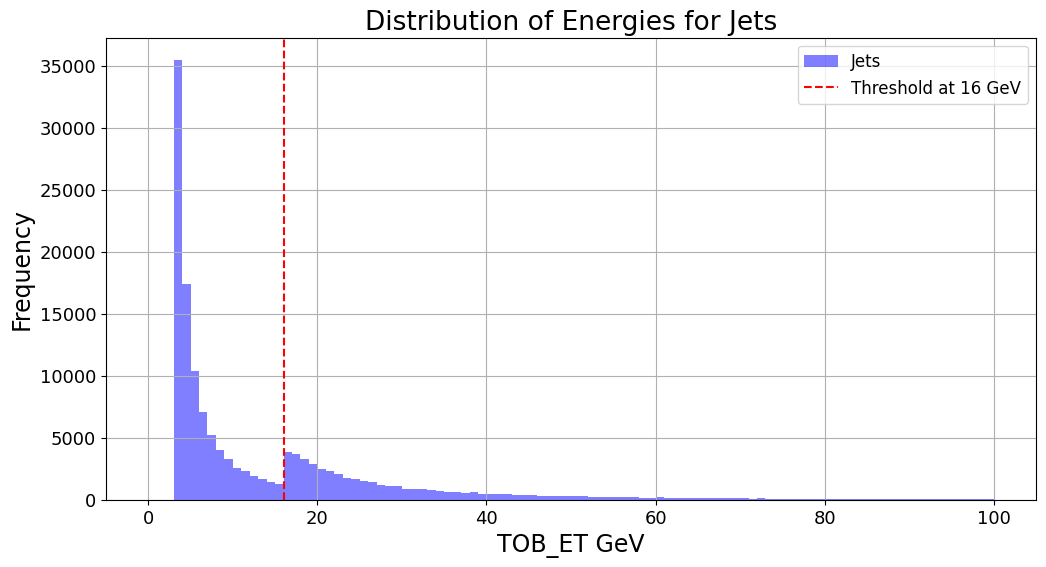

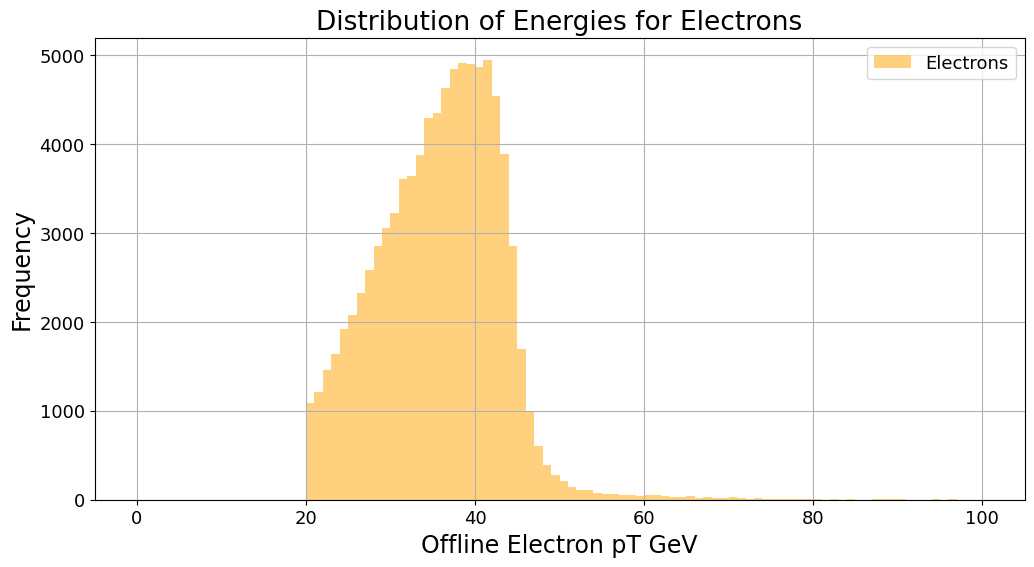

In [3]:
label_0 = Test_Data[Test_Data['label'] == 0]
label_1 = Test_Data[Test_Data['label'] == 1]

# Plot distributions of energies for both labels
plt.figure(figsize=(12, 6))
plt.hist(label_0['TOB_ET'], bins=100, alpha=0.5, color='blue', label='Jets', range=(0, 100))
plt.xlabel('TOB_ET GeV' , fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.title('Distribution of Energies for Jets', fontsize=19)
plt.axvline(x=16, color='red', linestyle='--', label='Threshold at 16 GeV')
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=13) 
plt.grid(True)
plt.show()

# Plot histogram for label 1
plt.figure(figsize=(12, 6))
plt.hist(label_1['offline_ele_pt'], bins=100, alpha=0.5, color='orange', label='Electrons',range=(0, 100))
plt.xlabel('Offline Electron pT GeV', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.title('Distribution of Energies for Electrons', fontsize=19)
plt.legend(fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)  # Adjusts the font size of the numbers on the axes

plt.grid(True)
plt.show()


47516
89057


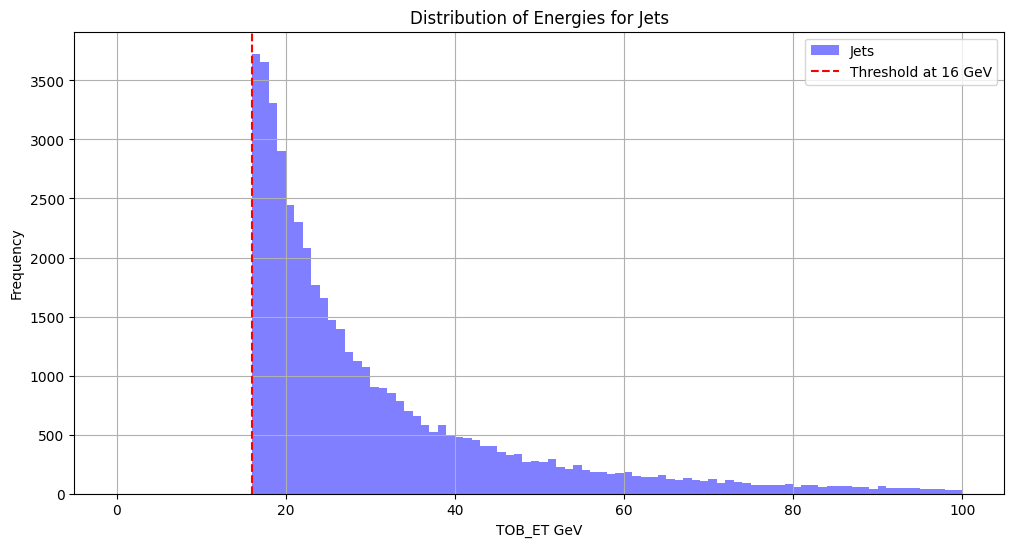

In [4]:
print(len(label_0[label_0['TOB_ET'] > 16]))
print(len(label_1[label_1['offline_ele_pt'] > 16]))
reduced_0 = label_0[label_0['TOB_ET'] > 16]
reduced_0.head()
plt.figure(figsize=(12, 6))
plt.hist(reduced_0['TOB_ET'], bins=100, alpha=0.5, color='blue', label='Jets', range=(0, 100))
plt.xlabel('TOB_ET GeV')
plt.ylabel('Frequency')
plt.title('Distribution of Energies for Jets')
plt.axvline(x=16, color='red', linestyle='--', label='Threshold at 16 GeV')
plt.legend()
plt.grid(True)
plt.show()

47516


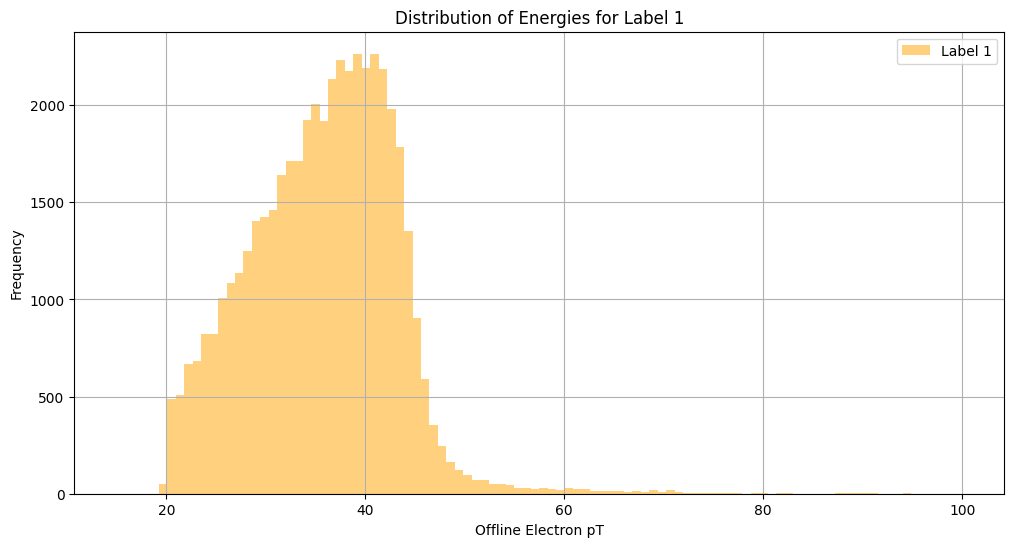

In [5]:
# Assuming label_1 has more than 10,000 instances
downsampled_label_1 = label_1.sample(n= len(reduced_0), random_state=69)
print(len(downsampled_label_1))

# Now you can check the length to confirm it's been downsampled

# Plot histogram for label 1
plt.figure(figsize=(12, 6))
plt.hist(downsampled_label_1['offline_ele_pt'], bins=100, alpha=0.5, color='orange', label='Label 1',range=(15, 100))
plt.xlabel('Offline Electron pT')
plt.ylabel('Frequency')
plt.title('Distribution of Energies for Label 1')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
downsampled_label_1.head()
reduced_0.head()

,L0_1,L0_2,L0_3,L0_4,L0_5,L0_6,L0_7,L0_8,L0_9,L1_1,...,Had_5,Had_6,Had_7,Had_8,Had_9,label,TOB_ET,offline_ele_pt,TOB_eta,ID
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0,19.2,0.0,2.2375,0
6,0.0,0.00,0.0,0.0,2.40,0.0,0.0,0.00,0.0,0.0,...,4.0,4.0,0.0,0.00,5.0,0,50.4,0.0,-0.8375,0
10,0.0,1.35,0.0,0.0,1.75,0.0,0.0,0.95,0.0,0.0,...,3.0,0.0,0.0,0.00,0.0,0,35.2,0.0,-1.0125,0
16,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,6.0,0.0,2.0,5.50,1.5,0,16.9,0.0,0.6125,0
18,0.0,0.00,0.0,0.0,3.75,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,2.45,0.0,0,23.5,0.0,1.6625,0


In [7]:
# Concatenate the two DataFrames
combined_df = pd.concat([downsampled_label_1, reduced_0])


combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv(r'\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\Train_data_Low_ET_gone_1.csv', index=False)



In [8]:

full_df = pd.read_csv('Train_data_Low_ET_gone_1.csv')

# Separate the data with label 1 and label 0
label_1 = full_df[full_df['label'] == 1]
label_0 = full_df[full_df['label'] == 0]

# Sample 5000 rows from each label
test_data_label_1 = label_1.sample(n=10000, random_state=1)
test_data_label_0 = label_0.sample(n=10000, random_state=1)

# Concatenate the two samples to create the test set
test_data = pd.concat([test_data_label_1, test_data_label_0])

# Remove the test data samples from the full dataset to create the training set
train_data = full_df.drop(test_data.index)

# Save the test set to a new CSV file
test_data.to_csv('Above_16GeV_TEST_DATA.csv_1', index=False)

# Save the training set to a new CSV file
train_data.to_csv('Above_16GeV_Train_DATA.csv_1', index=False)

print(len(test_data))
print(len(train_data))


20000
75032


In [9]:


file_path = r'C:\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\Above_16GeV_Train_DATA.csv_1'
Test_Data = pd.read_csv(file_path)
Test_Data.head()


,L0_1,L0_2,L0_3,L0_4,L0_5,L0_6,L0_7,L0_8,L0_9,L1_1,...,Had_5,Had_6,Had_7,Had_8,Had_9,label,TOB_ET,offline_ele_pt,TOB_eta,ID
0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,0.000,0.0,0.00,0.0,0.0,1,10.7,33.42019,-1.5125,3
1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.875,0.0,0.0,...,15.100,0.0,2.45,0.0,0.0,0,45.4,0.00000,-1.7875,0
2,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,3.175,0.0,0.00,0.0,0.0,0,16.5,0.00000,1.8125,0
3,0.0,0.0,0.0,0.0,2.825,0.0,0.0,0.000,0.0,0.0,...,0.000,0.0,0.00,0.0,0.0,1,36.2,34.56376,-1.1875,3
4,0.0,0.0,0.0,0.0,0.950,0.0,0.0,0.000,0.0,0.0,...,2.500,0.0,0.00,0.0,2.0,0,23.7,0.00000,-0.2375,0


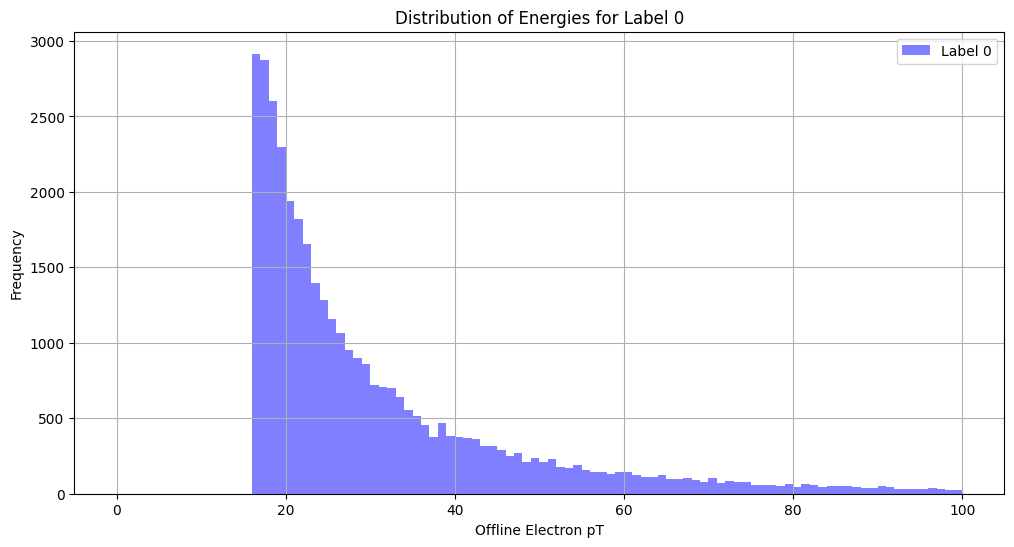

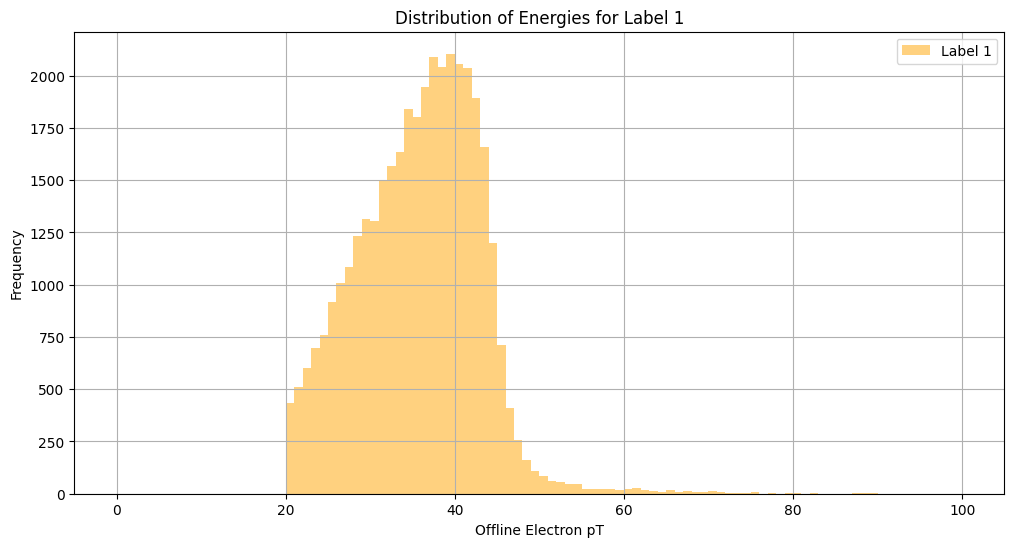

37516
37516


In [10]:
# Split the DataFrame into two based on the 'label' column
electrons = Test_Data[Test_Data['label'] == 1]
muons = Test_Data[Test_Data['label'] == 0]
# Plot distributions of energies for both labels
plt.figure(figsize=(12, 6))
plt.hist(muons['TOB_ET'], bins=100, alpha=0.5, color='blue', label='Label 0', range=(0, 100))
plt.xlabel('Offline Electron pT')
plt.ylabel('Frequency')
plt.title('Distribution of Energies for Label 0')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram for label 1
plt.figure(figsize=(12, 6))
plt.hist(electrons['offline_ele_pt'], bins=100, alpha=0.5, color='orange', label='Label 1',range=(0, 100))
plt.xlabel('Offline Electron pT')
plt.ylabel('Frequency')
plt.title('Distribution of Energies for Label 1')
plt.legend()
plt.grid(True)
plt.show()

print(len(electrons))
print(len(muons))

In [11]:
### new prams L0_5 
Test_Data['L0_centre_sum'] = Test_Data['L0_5']
#Test_Data['L0_peripheral_sum'] = Test_Data['L0_2'] + Test_Data['L0_4'] + Test_Data['L0_6'] + Test_Data['L0_8']
Test_Data['L1_centre_sum'] = Test_Data['L1_18'] + Test_Data['L1_19'] 
Test_Data['L1_wide_centre_sum'] = Test_Data['L1_17'] + + Test_Data['L1_20'] 
Test_Data['L1_wider_centre_sum'] = Test_Data['L1_16'] + + Test_Data['L1_15'] + Test_Data['L1_21'] + Test_Data['L1_22']
Test_Data['L2_centre_sum'] = Test_Data['L2_18'] + Test_Data['L2_19'] 
Test_Data['L2_wide_centre_sum'] = Test_Data['L2_17'] + Test_Data['L2_20']
Test_Data['L2_spread_sum'] = Test_Data['L2_16'] + Test_Data['L2_21'] 
Test_Data['L2_vertical_sum'] = Test_Data['L2_30'] + Test_Data['L2_31'] + Test_Data['L2_32'] + Test_Data['L2_29'] + Test_Data['L2_5'] + Test_Data['L2_6'] + Test_Data['L2_7'] + Test_Data['L2_8'] 
#Test_Data['L2_spread_sum'] = Test_Data['L2_21'] + Test_Data['L2_16']
# Test_Data['L3_peripheral_sum'] = Test_Data['L3_2'] + Test_Data['L3_4'] + Test_Data['L3_6'] + Test_Data['L3_8']
### new prams L3_5
Test_Data['L3_centre_sum'] = Test_Data['L3_5']
### new prams Had_5
Test_Data['Had_centre_sum'] = Test_Data['Had_5']
#Test_Data['Had_Vertical'] = Test_Data['Had_2'] + Test_Data['Had_8']
#Test_Data['Had_Horizontal'] = Test_Data['Had_4'] + Test_Data['Had_6']
Test_Data['Had_peripheral_sum'] = Test_Data['Had_2'] + Test_Data['Had_4'] + Test_Data['Had_6'] + Test_Data['Had_8']
Test_Data['Had_out_sum'] = Test_Data['Had_1'] + Test_Data['Had_3'] + Test_Data['Had_7'] + Test_Data['Had_9']

#test with more L2 data 
#Test_Data['rest_of_L2']= Test_Data['L2_1'] + Test_Data['L2_2'] + Test_Data['L2_3'] + Test_Data['L2_4'] + Test_Data['L2_5'] + Test_Data['L2_6'] + Test_Data['L2_7'] + Test_Data['L2_8'] + Test_Data['L2_9'] + Test_Data['L2_10'] + Test_Data['L2_11'] + Test_Data['L2_12'] + Test_Data['L2_13'] + Test_Data['L2_14'] + Test_Data['L2_15'] + Test_Data['L2_22'] + Test_Data['L2_23'] + Test_Data['L2_24'] + Test_Data['L2_25'] + Test_Data['L2_26'] + Test_Data['L2_27'] + Test_Data['L2_28'] + Test_Data['L2_29'] + Test_Data['L2_30'] + Test_Data['L2_31'] + Test_Data['L2_32'] + Test_Data['L2_33'] + Test_Data['L2_34'] + Test_Data['L2_35'] + Test_Data['L2_36']
Test_Data.head()

,L0_1,L0_2,L0_3,L0_4,L0_5,L0_6,L0_7,L0_8,L0_9,L1_1,...,L1_wide_centre_sum,L1_wider_centre_sum,L2_centre_sum,L2_wide_centre_sum,L2_spread_sum,L2_vertical_sum,L3_centre_sum,Had_centre_sum,Had_peripheral_sum,Had_out_sum
0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,3.050,1.850,0.000,2.725,2.300,0.000,0.00,0.000,0.0,0.00
1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.875,0.0,0.0,...,5.250,1.575,2.350,16.850,3.650,7.925,0.40,15.100,0.0,2.45
2,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,3.525,1.175,0.825,5.425,2.675,0.000,0.75,3.175,0.0,0.00
3,0.0,0.0,0.0,0.0,2.825,0.0,0.0,0.000,0.0,0.0,...,6.500,0.000,0.000,17.300,1.325,2.825,0.00,0.000,0.0,0.00
4,0.0,0.0,0.0,0.0,0.950,0.0,0.0,0.000,0.0,0.0,...,0.750,0.950,9.700,1.600,0.000,4.325,0.00,2.500,0.0,2.00


In [13]:
# Specify your new file path or name
new_file_path = r'\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\New_prams_2.csv'

# Save the DataFrame to a new CSV file
Test_Data.to_csv(new_file_path, index=False)
